<a href="https://colab.research.google.com/github/MkRakesh/MkRakesh/blob/main/Copy_of_Project_Food101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#get helper functions

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-08-26 04:13:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-26 04:13:35 (21.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# !pip install --upgrade pip

In [ ]:
# !pip install tensorflow==2.4.1

In [ ]:
# import helper functions
from helper_functions import create_tensorboard_callback ,plot_loss_curves ,compare_historys

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
#list all datasets
datasets_list=tfds.list_builders() #get the list
print('food101' in datasets_list) #is the food 101 available

True


In [ ]:
#load data into colab
(train_data,test_data),ds_info  =tfds.load(name='food101',
                                         split=["train" ,"validation"],
                                         as_supervised = True, # data returns in tuple format(data,label)
                                         with_info=True
                                          )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteJ6RPSQ/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteJ6RPSQ/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## **Examine data**


*   Class names
*   shape of tensors
* datatype of i/p tensors
* are labels one_hot encoded or label encoded
* Do the labels match up with class names



In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
#get class names
class_names=ds_info.features['label'].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
#take one sample out of train_data
import tensorflow as tf
import numpy as np
random =np.random.randint(1,10)
train_one_sample =train_data.take(random)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for image ,label in train_one_sample:
  print(f'image shape : {image.shape}')
  print(f'image datatype : {image.shape}')
  print(f'target class (tensor_form): {label}')
  print(f'class name (str form): {class_names[label.numpy()]}')


image shape : (512, 512, 3)
image datatype : (512, 512, 3)
target class (tensor_form): 56
class name (str form): huevos_rancheros


In [ ]:
image


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[233, 253, 251],
        [231, 253, 250],
        [228, 254, 251],
        ...,
        [ 85,  82,  89],
        [ 68,  67,  75],
        [ 57,  57,  67]],

       [[232, 254, 252],
        [229, 254, 251],
        [226, 255, 251],
        ...,
        [121, 116, 120],
        [100,  99, 104],
        [ 86,  85,  91]],

       [[228, 254, 253],
        [226, 255, 253],
        [223, 255, 252],
        ...,
        [164, 159, 155],
        [145, 141, 138],
        [128, 127, 125]],

       ...,

       [[ 66, 112, 164],
        [ 67, 113, 163],
        [ 55,  99, 148],
        ...,
        [  5,  14,  23],
        [  9,  18,  27],
        [  8,  17,  26]],

       [[ 76, 123, 177],
        [ 75, 122, 176],
        [ 70, 116, 168],
        ...,
        [  5,  14,  23],
        [  9,  18,  25],
        [  7,  16,  23]],

       [[ 80, 129, 185],
        [ 71, 121, 174],
        [ 74, 121, 175],
        ...,
        [  7,  16,  2

Text(0.5, 1.0, 'huevos_rancheros')

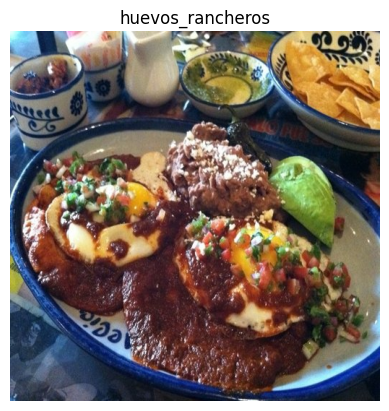

In [ ]:
# visualise an image

import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis(False)
plt.title(class_names[label])

## NN prefers normalize , batch_sized data  
our data is  
'uint8' dtype  
not scaled(0-255)    

## we need  
scaled(0-1) , float32, batched  

*Since we are uding EfficientnetBX model , no need to rescale



In [ ]:
#create preprocessig functions for our data

In [ ]:
def preprocess_image(image ,label, image_shape=224):
  #change image dtype
  image=tf.image.resize(image, [image_shape ,image_shape])
  return tf.cast(image, tf.float32) ,label

In [ ]:
#check above function with one image
preprocessed_image=preprocess_image(image,label)[0]
preprocessed_image


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[230.65816  , 253.64285  , 251.       ],
        [222.99998  , 254.97449  , 252.19388  ],
        [207.06633  , 255.       , 250.36734  ],
        ...,
        [140.66287  , 129.52519  , 121.22428  ],
        [121.14268  , 115.26515  , 116.95397  ],
        [ 83.95363  ,  83.08119  ,  89.63737  ]],

       [[221.47449  , 254.37755  , 253.33163  ],
        [214.5102   , 255.       , 253.92348  ],
        [198.41327  , 254.58673  , 251.96939  ],
        ...,
        [208.66318  , 195.82143  , 173.40823  ],
        [197.03056  , 190.1071   , 174.83162  ],
        [175.54036  , 171.6169   , 161.21384  ]],

       [[204.21428  , 253.42857  , 249.57143  ],
        [198.71428  , 254.64287  , 251.2449   ],
        [185.04591  , 251.73979  , 252.21428  ],
        ...,
        [222.45403  , 207.47444  , 169.35715  ],
        [216.52551  , 205.01024  , 172.02556  ],
        [215.51529  , 207.87244  , 177.58672  ]],

       ...,

     

In [ ]:
#dtype has been changed to float32

In [ ]:
#batching and preparing of data
train_data = train_data.map(map_func=preprocess_image , num_parallel_calls= tf.data.AUTOTUNE)

#shuffle train data turn to batches
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

#maping preprocessing to test data
test_data = test_data.map(map_func=preprocess_image , num_parallel_calls= tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
''' create call backs
1. TensorBoard callback
2. ModelCheckpoint callback
'''

' create call backs\n1. TensorBoard callback\n2. ModelCheckpoint callback\n'

In [ ]:
#import tensorboard call back from helper functions

from helper_functions import create_tensorboard_callback

#create checkpoint callback
checkpoint_path='model_checkpoint/cp.kpt'
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                    monitor='val_acc',
                                                    save_best_only=True,
                                                    verbose=0)#dont print if the model is being saved


In [ ]:
#set mixed precision training-->utilise combination of float16 and float32 to speed up

from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [ ]:
#Build feature extraction model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#create the base model
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=0)
base_model.trainable=False

inputs=layers.Input(shape=input_shape, name='input_layer')
x=base_model(inputs,training=False)
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(len(class_names))(x)
outputs=layers.Activation("softmax",dtype=tf.float32, name='softmax_activation')(x)
model=tf.keras.Model(inputs,outputs)

#compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_activation (Activat  (None, 101)              0         
 ion)                                                            
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [ ]:
len(class_names)

101

In [ ]:
label

<tf.Tensor: shape=(), dtype=int64, numpy=56>

In [ ]:
for layer in model.layers:
  print(layer.name ,layer.trainable, layer.dtype_policy)

''''
layer.name = human readable form of layer
layer.trainable = is layer trainable?
layer.dtype_policy = datatype policy of computation
'''

input_layer True <Policy "float32">
efficientnetb0 False <Policy "mixed_float16">
global_average_pooling2d True <Policy "mixed_float16">
dense True <Policy "mixed_float16">
softmax_activation True <Policy "float32">


"'\nlayer.name = human readable form of layer\nlayer.trainable = is layer trainable?\nlayer.dtype_policy = datatype policy of computation\n"

In [ ]:
#fit the model

history_101_feature_extraction = model.fit(train_data,
                                           validation_data=test_data,
                                           steps_per_epoch=len(train_data),
                                           valid  ation_steps=(.15*len(test_data)),
                                           epochs=3,
                                           callbacks=[model_checkpoint,create_tensorboard_callback(dir_name="trining_logs",experiment_name="EfficientnetB0_101_feature_extraction")])

Saving TensorBoard log files to: trining_logs/EfficientnetB0_101_feature_extraction/20230826-042654
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.7188 - accuracy: 0.5820

2368/2368 [==============================] - 216s 83ms/step - loss: 1.7188 - accuracy: 0.5820 - val_loss: 1.1305 - val_accuracy: 0.6996
Epoch 2/3
2368/2368 [==============================] - ETA: 0s - loss: 1.2001 - accuracy: 0.6886

2368/2368 [==============================] - 205s 85ms/step - loss: 1.2001 - accuracy: 0.6886 - val_loss: 1.0356 - val_accuracy: 0.7185
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.0552 - accuracy: 0.7232

2368/2368 [==============================] - 191s 79ms/step - loss: 1.0552 - accuracy: 0.7232 - val_loss: 0.9981 - val_accuracy: 0.7295


In [ ]:
#lets evaluate on full test data
# model.evaluate(test_data)

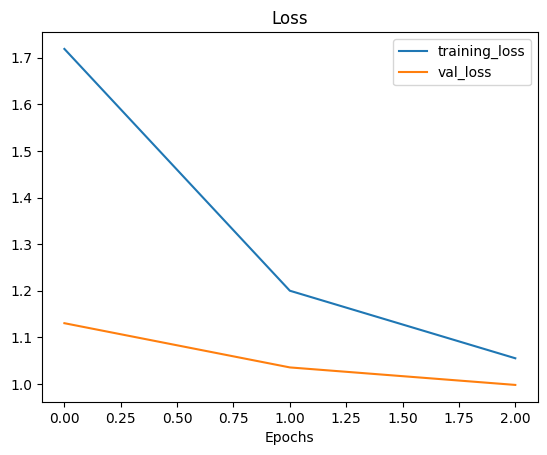

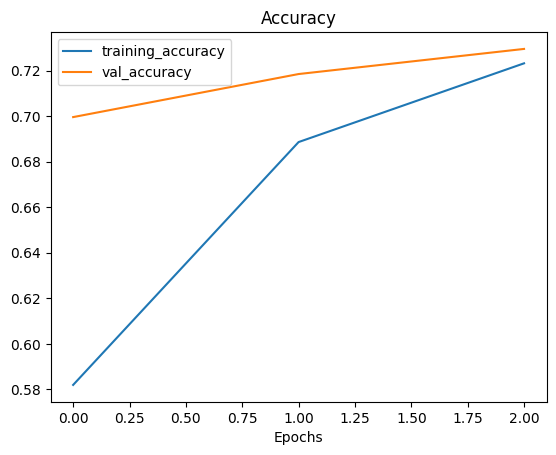

In [ ]:
plot_loss_curves(history_101_feature_extraction)

## Fine tuning of last model

Lets make last 5 layers of our base_model trainable and fine tune

In [ ]:
model.layers[0].trainable

True

In [ ]:
#unfreeze all layers in base model

base_model.trainable=True

#refreeze every layer except the last 10

# for layer in base_model.layers[5:]:
#   layer.trainable=False

In [ ]:
#recompile the model for changes made

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
                metrics=['accuracy'])

In [ ]:
for layer_number, layer in enumerate(model.layers[1].layers):
  print(layer_number,layer.name,layer.trainable)

0 input_1 True
1 rescaling True
2 normalization True
3 rescaling_1 True
4 stem_conv_pad True
5 stem_conv True
6 stem_bn True
7 stem_activation True
8 block1a_dwconv True
9 block1a_bn True
10 block1a_activation True
11 block1a_se_squeeze True
12 block1a_se_reshape True
13 block1a_se_reduce True
14 block1a_se_expand True
15 block1a_se_excite True
16 block1a_project_conv True
17 block1a_project_bn True
18 block2a_expand_conv True
19 block2a_expand_bn True
20 block2a_expand_activation True
21 block2a_dwconv_pad True
22 block2a_dwconv True
23 block2a_bn True
24 block2a_activation True
25 block2a_se_squeeze True
26 block2a_se_reshape True
27 block2a_se_reduce True
28 block2a_se_expand True
29 block2a_se_excite True
30 block2a_project_conv True
31 block2a_project_bn True
32 block2b_expand_conv True
33 block2b_expand_bn True
34 block2b_expand_activation True
35 block2b_dwconv True
36 block2b_bn True
37 block2b_activation True
38 block2b_se_squeeze True
39 block2b_se_reshape True
40 block2b_se_

In [ ]:
# history_101_fine_tuned=model.fit()

In [ ]:
initial_epochs=3
fine_tune_epochs=initial_epochs+3

history_finetune_10p_aug=model.fit(train_data,
                          epochs=fine_tune_epochs,
                          validation_data=test_data,
                          steps_per_epoch=len(train_data),
                          validation_steps=(.25*len(test_data)),
                          initial_epoch=history_101_feature_extraction.epoch[-1],#start from last trained epoch of model_1
                          callbacks=[model_checkpoint,create_tensorboard_callback(dir_name='transfer_learning',
                                                                                     experiment_name="food_101_finetuned")])

Saving TensorBoard log files to: transfer_learning/food_101_finetuned/20230826-043804
Epoch 3/6
2368/2368 [==============================] - ETA: 0s - loss: 0.8696 - accuracy: 0.7663

2368/2368 [==============================] - 439s 160ms/step - loss: 0.8696 - accuracy: 0.7663 - val_loss: 0.7934 - val_accuracy: 0.7735
Epoch 4/6
2368/2368 [==============================] - ETA: 0s - loss: 0.5263 - accuracy: 0.8542

2368/2368 [==============================] - 379s 158ms/step - loss: 0.5263 - accuracy: 0.8542 - val_loss: 0.7838 - val_accuracy: 0.7824
Epoch 5/6
2368/2368 [==============================] - ETA: 0s - loss: 0.2838 - accuracy: 0.9196

2368/2368 [==============================] - 382s 159ms/step - loss: 0.2838 - accuracy: 0.9196 - val_loss: 0.9038 - val_accuracy: 0.7784
Epoch 6/6
2367/2368 [============================>.] - ETA: 0s - loss: 0.1486 - accuracy: 0.9566

2368/2368 [==============================] - 376s 157ms/step - loss: 0.1487 - accuracy: 0.9565 - val_loss: 1.0696 - val_accuracy: 0.7667


In [ ]:
model.evaluate(test_data)

790/790 [==============================] - 55s 69ms/step - loss: 1.1065 - accuracy: 0.7655


[1.1065037250518799, 0.7654653191566467]

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_activation (Activat  (None, 101)              0         
 ion)                                                            
                                                                 
Total params: 4,178,952
Trainable params: 4,136,929
Non-train

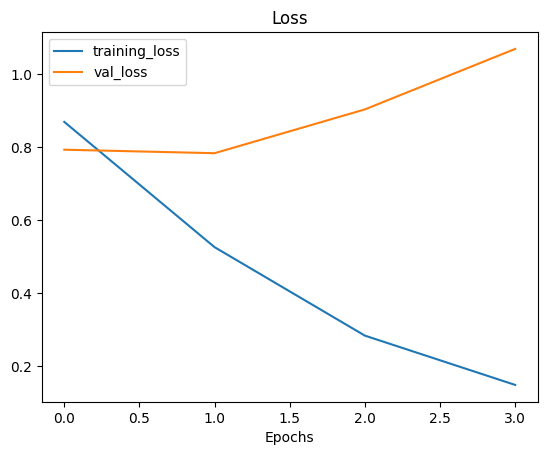

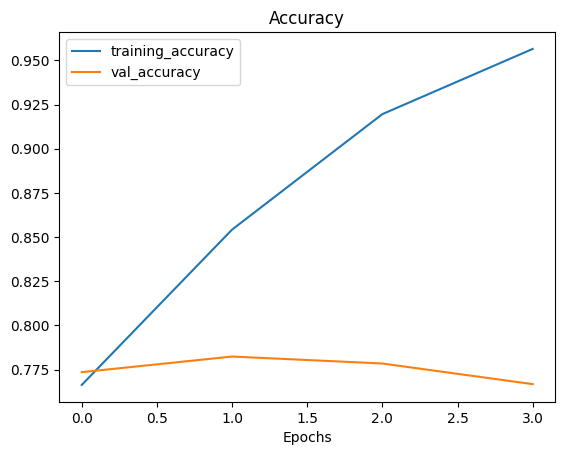

In [ ]:
plot_loss_curves(history_finetune_10p_aug)

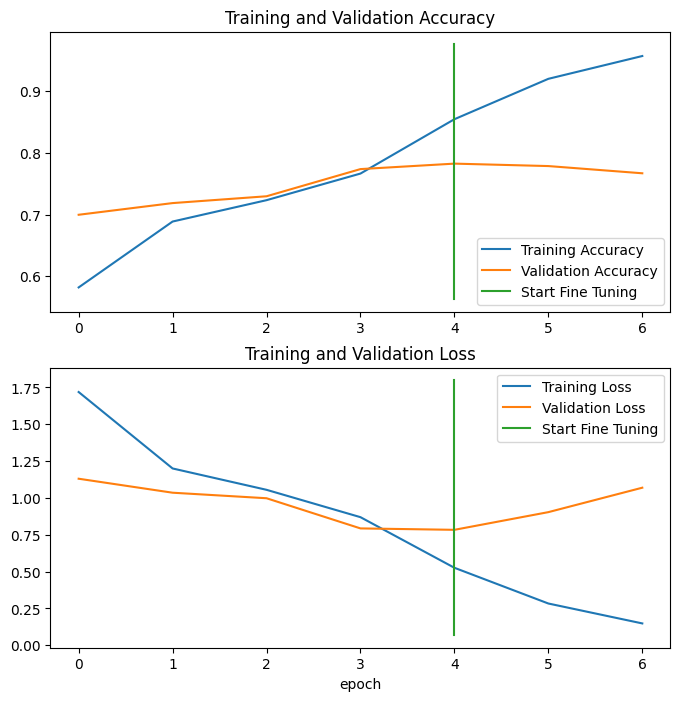

In [ ]:
compare_historys(history_101_feature_extraction,history_finetune_10p_aug)

In [ ]:
# def image_prep(file_name,img_shape=224): #img_shape=24..? adjust as per shape
#   img=tf.io.read_file(file_name)
#   img=tf.image.decode_image(img)
#   img=tf.image.resize(img,size=[img_shape,img_shape])
#   img=img/256
#   return img

# def pred_and_plot(model,file_name,class_names=food101_class):
#   img=image_prep(file_name) # calling function to prepare our image for prediction
#   pred=model.predict(tf.expand_dims(img,axis=0))
#   pred = pred.reshape(-1)
#   print(pred)
#   pred_class_index=tf.argmax(pred[0])
#   pred_class=class_names[pred_class_index]
#   plt.imshow(img)
#   plt.title(f'prediction : {pred_class}')
#   plt.show()

In [ ]:
def image_prep(file_name,img_shape=224): #img_shape=24..? adjust as per shape
  img=tf.io.read_file(file_name)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/256
  return img

import matplotlib.pyplot as plt
#adjust custom preidction function for multiclass
def pred_and_plot(model,file_name,class_names=class_names):

  img=image_prep(file_name) # calling function to prepare our image for prediction
  pred=model.predict(tf.expand_dims(img,axis=0))
  if len(pred[0])>1:
    pred_class=class_names[tf.argmax(pred[0])]
  else:
    pred_class=class_names[int(tf.round(pred[0]))]
  print(pred[0])
  print(tf.argmax(pred[0]))
  print(pred_class)
  plt.imshow(img)
  plt.title(f'prediction : {pred_class}')
  plt.show()

1/1 [==============================] - 2s 2s/step
[9.50299000e-06 4.55426984e-04 8.49477292e-05 5.87068556e-04
 3.52614734e-04 2.22574614e-04 1.06564234e-03 2.61363020e-05
 2.53483275e-04 8.98639917e-01 1.87941501e-03 1.27608143e-06
 2.20951133e-05 1.94579184e-06 6.35513243e-06 1.19328470e-04
 2.20445276e-04 7.63700664e-05 5.20720869e-06 1.36031781e-03
 3.45372653e-04 3.84821033e-04 7.22351469e-05 6.84679078e-04
 4.48889432e-06 1.04983264e-05 4.68598091e-06 1.08878477e-03
 1.18649041e-03 4.20379278e-04 1.46898001e-05 4.12449735e-04
 3.57939316e-05 1.37883777e-04 1.50088154e-05 1.75102309e-06
 1.32213623e-04 2.44853582e-04 4.86934645e-04 1.02937327e-06
 7.15331698e-05 4.07583684e-05 2.00938332e-04 5.75346712e-05
 3.58955411e-04 2.50859939e-05 3.40165707e-06 3.45236840e-05
 1.44338355e-05 4.77983063e-04 3.44194210e-04 8.80864158e-04
 7.22351469e-05 4.10641165e-04 5.39250730e-04 1.75470832e-05
 1.44598971e-06 6.41749830e-06 4.44659847e-04 1.05014606e-03
 3.20228683e-05 5.92363494e-06 3.50

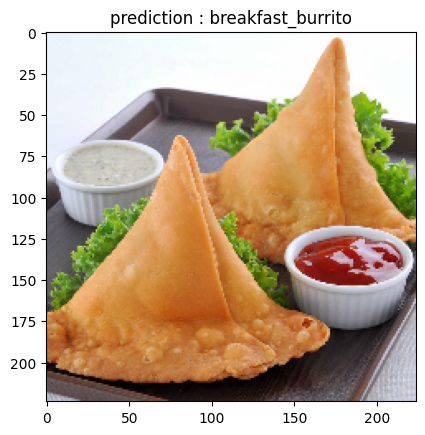

In [ ]:
 pred_and_plot(model,'/content/Samosa.jpeg')

## Summary  
We could improve the accuracy by 3% with tuning of last three layers of our base_model(EfficientNetB0). Looks like further tuning is possible with more layes.